# 수DA쟁이 2기 장민수 과제 발표 포켓몬

In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [25]:
pokemon = pd.read_csv("C:/pokemon/pokemon_data.csv")

## 데이터 탐구 

In [26]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [28]:
pokemon.shape

(800, 13)

In [29]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [30]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 종족별 포켓몬 수 확인하기 & 시각화

In [31]:
type1_classifier = pokemon[['Type 1','Name']].copy()
type1_classifier = type1_classifier.groupby(["Type 1"]).agg({'Name': 'count'}).reset_index()
type1_classifier.columns = ["Type 1","Total"]
type1_classifier= type1_classifier.sort_values(by=['Total'],ascending=False)
type1_classifier

,Type 1,Total
17,Water,112
12,Normal,98
9,Grass,70
0,Bug,69
14,Psychic,57
6,Fire,52
3,Electric,44
15,Rock,44
8,Ghost,32
10,Ground,32


<AxesSubplot:ylabel='Total'>

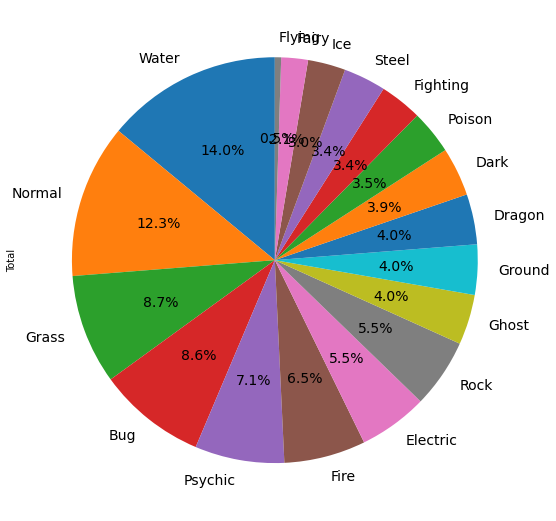

In [32]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(121, aspect='equal')
type1_classifier.plot(kind='pie', y = 'Total', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, 
                      labels=type1_classifier['Type 1'], legend = False, fontsize=14)

## 종족 비교와 두가지 종족 탐구

These are the types of Pokemon in Type 1 column in the dataset : 

 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] 

There are a total of : 

 18 different types of pokemons


These are the value counts of the type of Pokemons in column Type 1

 Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


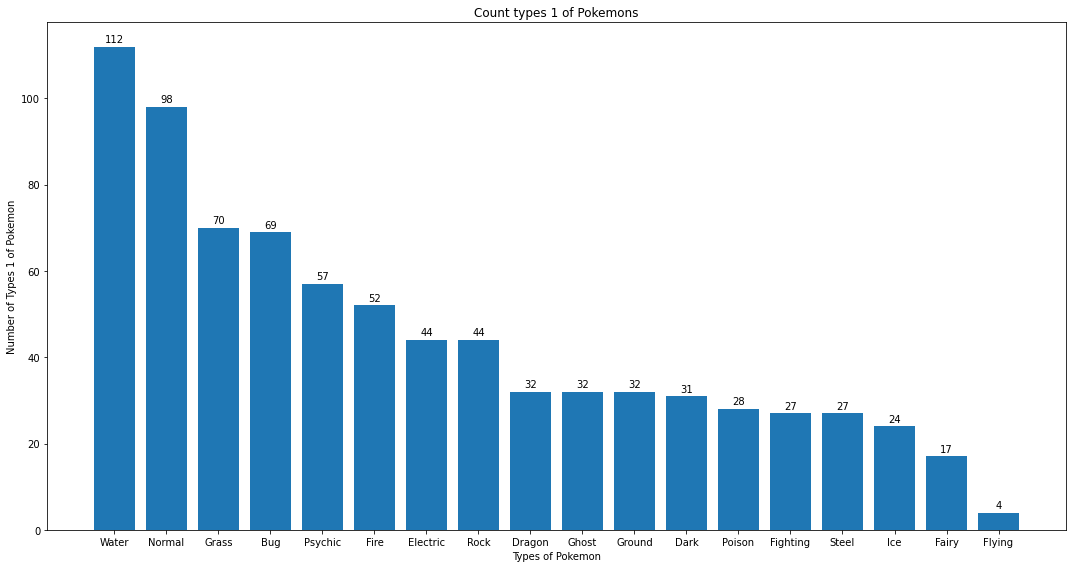

In [33]:
def type_1():
    print('These are the types of Pokemon in Type 1 column in the dataset : \n\n',pokemon['Type 1'].unique(),'\n')
    print('There are a total of : \n\n',pokemon['Type 1'].nunique(),'different types of pokemons')
    print('\n\nThese are the value counts of the type of Pokemons in column Type 1\n\n',pokemon['Type 1'].value_counts())

    
    type_1_number = pokemon['Type 1'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(type_1_number.index,type_1_number.values) 
    
    for i in range(type_1_number.shape[0]):
        ax.text(i, type_1_number.values[i]+1, type_1_number.values[i], horizontalalignment='center')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Number of Types 1 of Pokemon')
    ax.set_title('Count types 1 of Pokemons')
    plt.tight_layout()
type_1()

These are the types of Pokemon in Type 2 column in the dataset :

 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal'] 

There are a total of : 

 18 different types 2  of pokemons


These are the value counts of the type of Pokemons in column TYPE 2

 Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Rock        14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


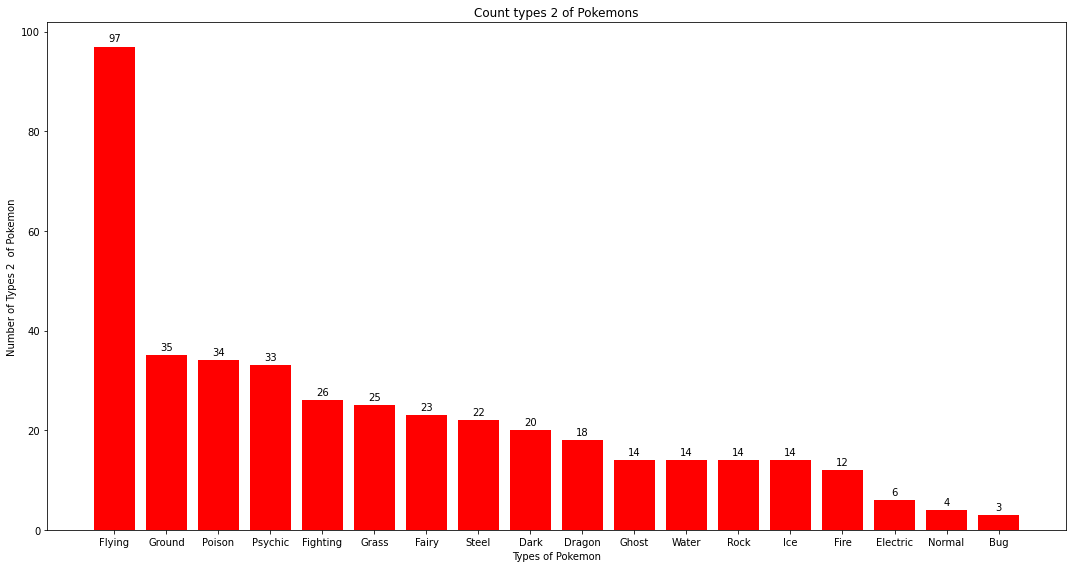

In [34]:
def type_2():

    print('These are the types of Pokemon in Type 2 column in the dataset :\n\n',pokemon['Type 2'].unique(),'\n')
    print('There are a total of : \n\n',pokemon['Type 2'].nunique(),'different types 2  of pokemons')
    print('\n\nThese are the value counts of the type of Pokemons in column TYPE 2\n\n',pokemon['Type 2'].value_counts())
    
    
    type_2_number = pokemon['Type 2'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(type_2_number.index,type_2_number.values,color='red')
    for i in range(type_2_number.shape[0]):
        ax.text(i, type_2_number.values[i]+1, type_2_number.values[i], horizontalalignment='center')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Number of Types 2  of Pokemon')
    ax.set_title('Count types 2 of Pokemons')
    plt.tight_layout()
type_2()

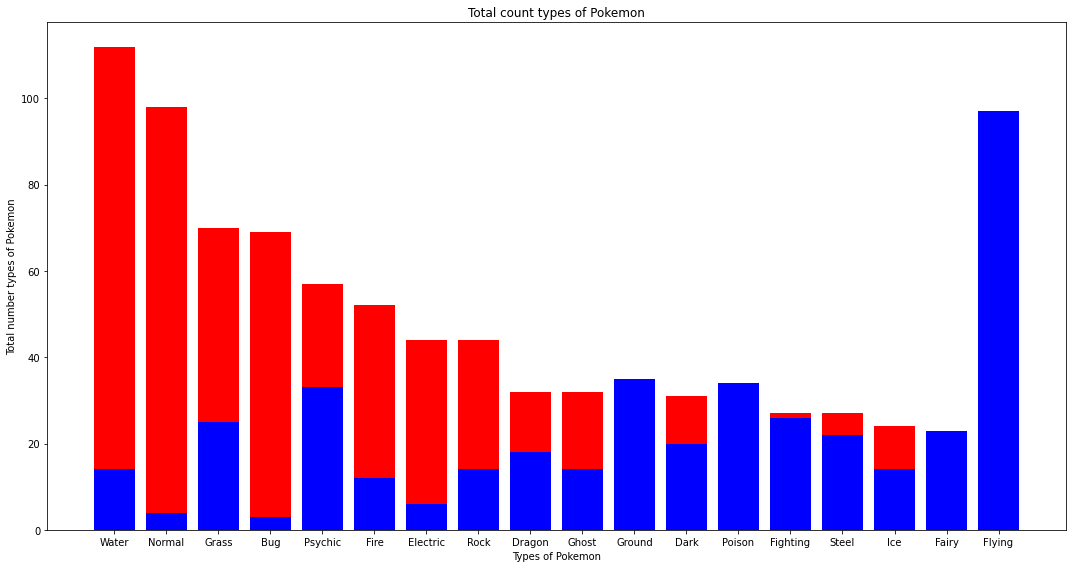

In [35]:
def type_3():
    type_2_number = pokemon['Type 2'].value_counts()
    type_1_number = pokemon['Type 1'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(type_1_number.index,type_1_number.values,color='red')
    ax.bar(type_2_number.index,type_2_number.values,color='blue')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Total number types of Pokemon')
    ax.set_title('Total count types of Pokemon')
    plt.tight_layout()
type_3()

In [36]:
def combination_of_type1_type2 ():
    pokemon['Type 1-2'] = pokemon['Type 1'] + " - " + pokemon['Type 2']
    return pokemon['Type 1-2'].value_counts()
combination_of_type1_type2 ()

Normal - Flying      24
Grass - Poison       15
Bug - Flying         14
Bug - Poison         12
Water - Ground       10
                     ..
Steel - Dragon        1
Ground - Steel        1
Grass - Ground        1
Fighting - Flying     1
Ghost - Dark          1
Name: Type 1-2, Length: 136, dtype: int64

## Pokemons with Secondary Attribute, Grouped By, with Avg Power

## 종족이 두가지인 포켓몬의 종족값 정보 확인

In [37]:
pk_with_secondary = pokemon[['Type 1','Type 2','Total']].copy()
pk_with_secondary.columns = ["Type1","Type2",'Total']
pk_with_secondary = pk_with_secondary.query('Type2 == Type2').groupby(["Type1","Type2"]).agg({'Total':[ 'mean','max','min']}).reset_index()
pk_with_secondary.columns = [''.join(col) for col in pk_with_secondary.columns]
pk_with_secondary = pk_with_secondary.sort_values(by=['Totalmean'],ascending=False)
pk_with_secondary['Type'] = pk_with_secondary['Type1'] + 'x' + pk_with_secondary['Type2'] 
pk_with_secondary = pk_with_secondary.drop(['Type1','Type2'], axis=1)
pk_with_secondary

,Totalmean,Totalmax,Totalmin,Type
70,770.000000,770,770,GroundxFire
24,686.666667,700,660,DragonxIce
114,680.000000,680,680,SteelxDragon
52,680.000000,680,680,GhostxDragon
95,680.000000,680,680,PsychicxDark
...,...,...,...,...
88,330.000000,330,330,PoisonxBug
81,330.000000,545,190,NormalxFairy
94,320.000000,320,320,PoisonxWater
10,269.000000,269,269,BugxWater


In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Power',
    x=pk_with_secondary['Type'], y=pk_with_secondary['Totalmean'],
    error_y=dict(type='data', 
            symmetric=False,
            array=pk_with_secondary['Totalmax'] - pk_with_secondary['Totalmean'],
            arrayminus=pk_with_secondary['Totalmean'] - pk_with_secondary['Totalmin'])
))
fig.update_layout(barmode='group')
fig.show()

## 비전설포켓몬

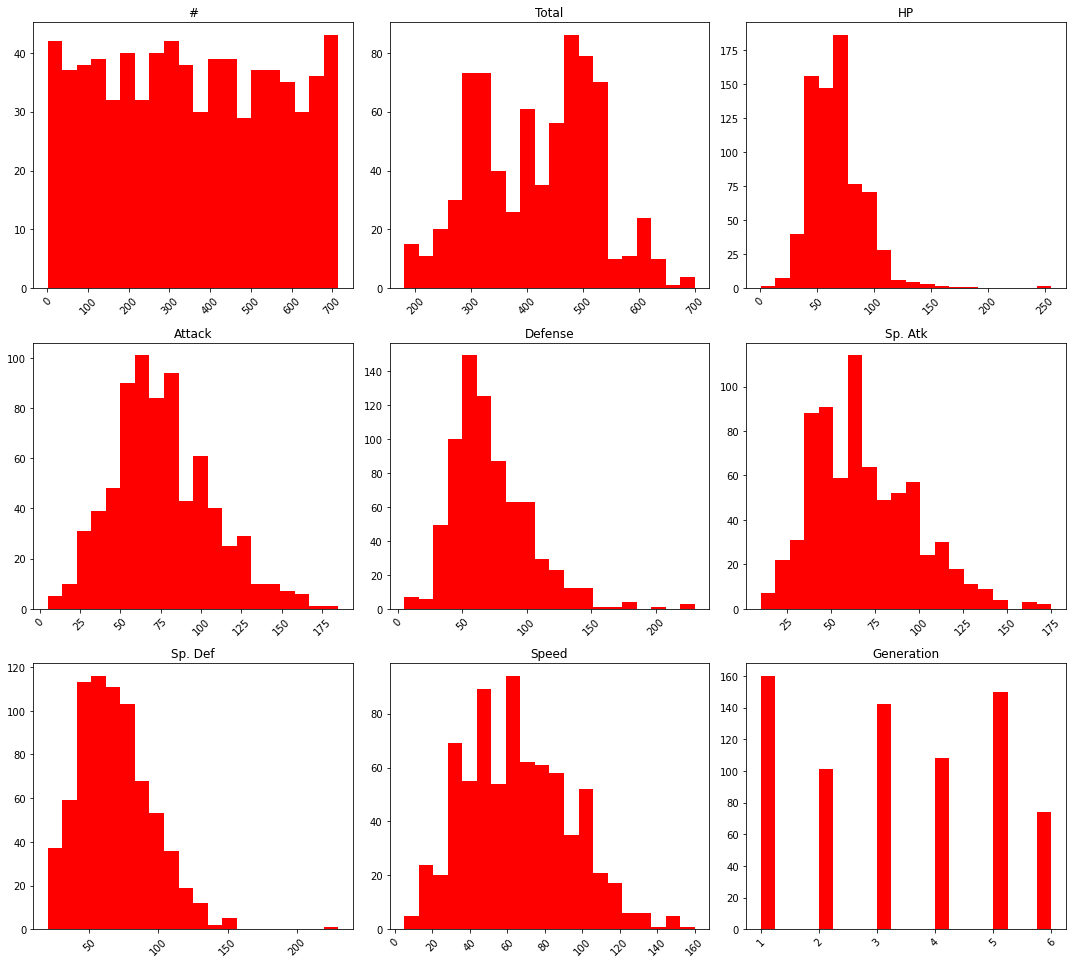

In [40]:
non_legendary = pokemon[pokemon['Legendary']==False] 
legendary = pokemon[pokemon['Legendary']==True]
fig = non_legendary.iloc[:,0:12].hist(bins=20, color='red', linewidth=0.5, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

## 전설의 포켓몬

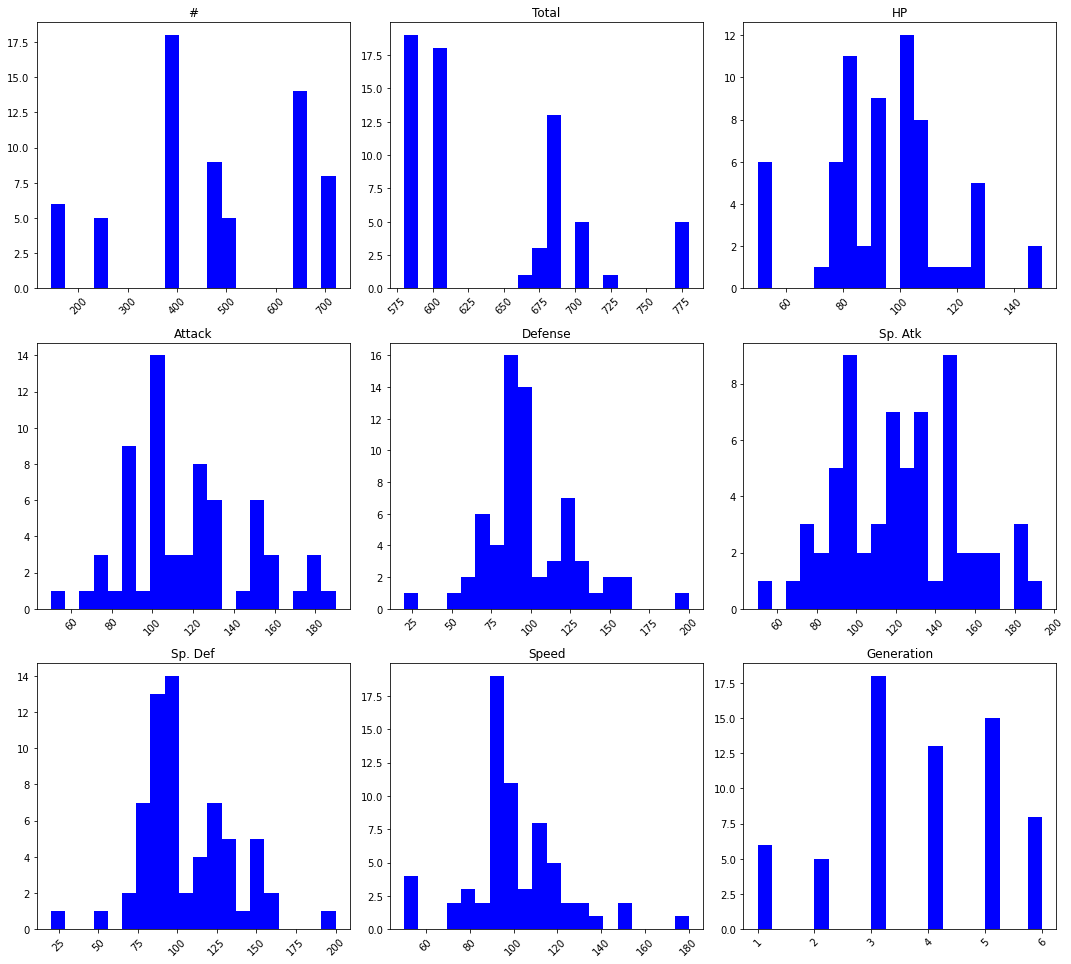

In [41]:
fig = legendary.iloc[:,0:12].hist(bins=20, color='blue', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

<Figure size 432x288 with 0 Axes>

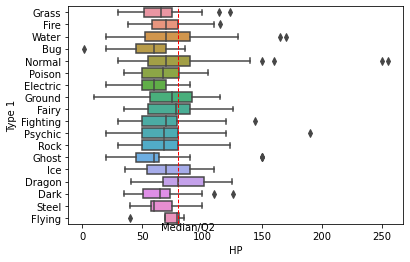

In [42]:
def poke_box_HP():
    fig = plt.figure()
    ax = sns.boxplot(y="Type 1", x="HP",
            data=pokemon)
    
    
    plt.axvline(pokemon[pokemon['Type 1']=='Dragon']['HP'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (pokemon[pokemon['Type 1']=='Dragon']['HP']-14).quantile(.5),18,'Median/Q2')
    
    
    
plt.tight_layout()
poke_box_HP()

## 자 이제 종나 센 포켓몬이 뭔지 확인해 보겟음

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



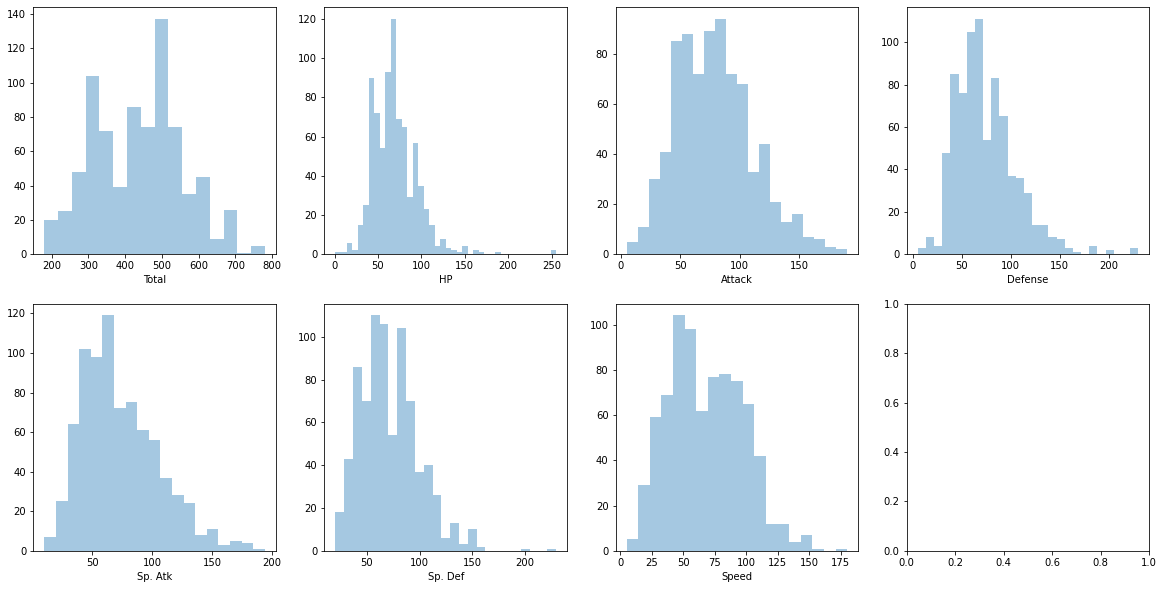

In [44]:
numerical = pokemon.iloc[:,4:11]
fig, axes = plt.subplots(2,4, figsize=(20,10))
a = 0
b = 0
for col in numerical.columns:
    sns.distplot(numerical[col], ax = axes[a][b], kde=False )
    b+=1
    if b == 4:
        b = 0
        a += 1

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Legendary', ylabel='count'>

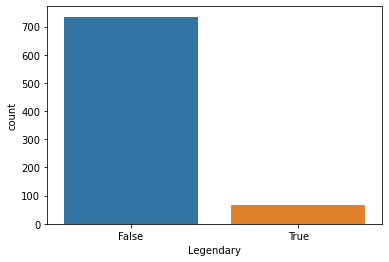

In [45]:
sns.countplot(pokemon["Legendary"])

## 타입별, 세대별 전설 비전설 분류

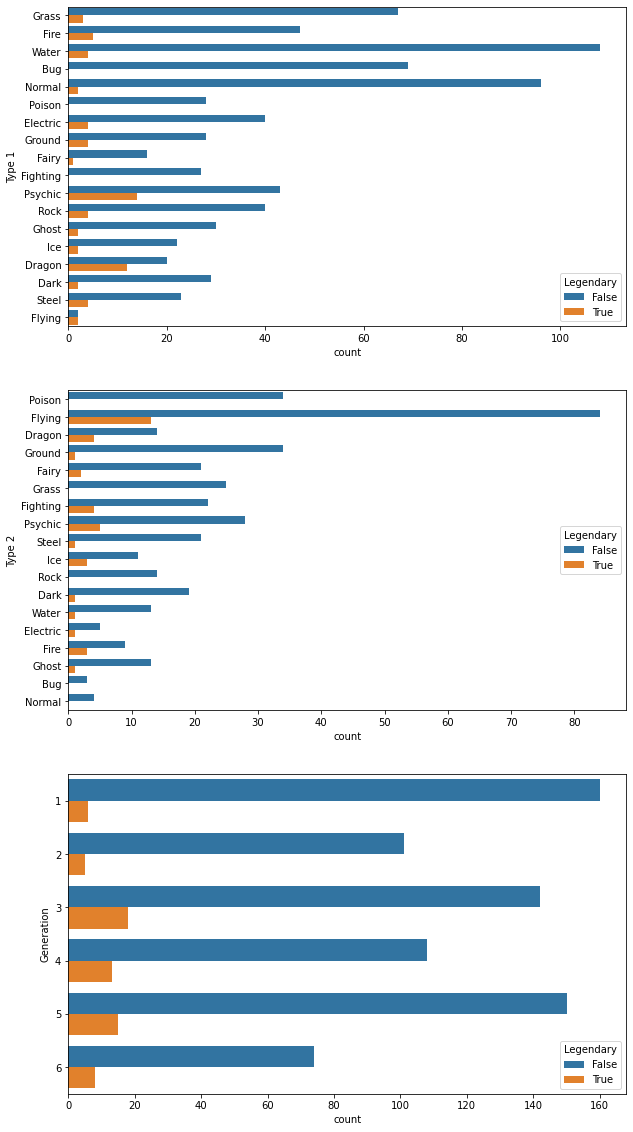

In [46]:
categorical = pokemon[["Type 1", "Type 2", "Generation", "Legendary"]]


fig, axes = plt.subplots(3, figsize=(10,20))
# a = 0
b = 0
for col in categorical.columns:
    if col == "Legendary":
        break
    sns.countplot(y = categorical[col], hue= "Legendary", data = pokemon, ax = axes[b])
#     axes[a][b].set_xticklabels(axes[a][b].get_xticklabels(), rotation=90)
    b+=1
# ax = sns.countplot(df["Type 1"])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='Total', ylabel='Attack'>

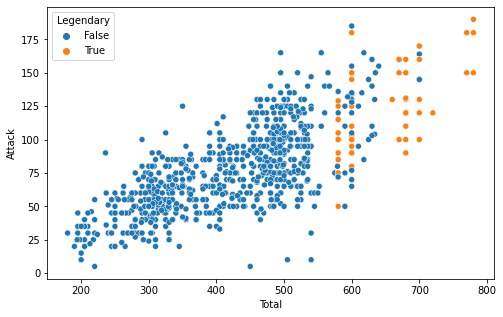

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total", y="Attack", hue="Legendary", data=pokemon)

In [48]:
from sklearn.preprocessing import LabelEncoder  #For convert categorical feature into number
le = LabelEncoder()
pokemon["Type 1"] = le.fit_transform(pokemon["Type 1"])
pokemon["Type 2"] = pokemon["Type 2"].fillna("Null") #Remove NaN values
pokemon["Type 2"] = le.fit_transform(pokemon["Type 2"])
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1-2
0,1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False,Grass - Poison
1,2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False,Grass - Poison
2,3,Venusaur,9,14,525,80,82,83,100,100,80,1,False,Grass - Poison
3,3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False,Grass - Poison
4,4,Charmander,6,13,309,39,52,43,60,50,65,1,False,NaN


<AxesSubplot:>

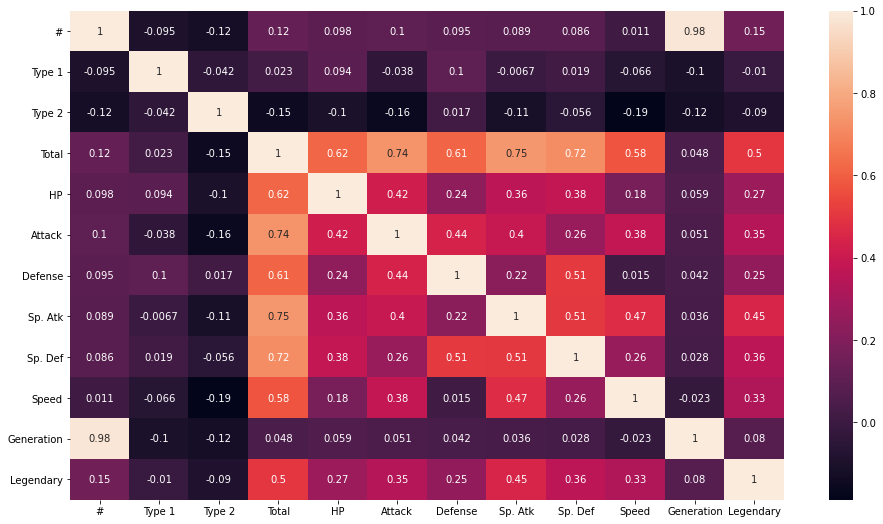

In [49]:
plt.figure(figsize=(16,9))
sns.heatmap(pokemon.corr(), annot = True)

In [50]:
from sklearn.model_selection import train_test_split
X = pokemon.drop(['Name', 'Legendary'], axis = 1)
y = pokemon['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #Split dataset into train and test set

In [ ]:
a = Tatal